# Off-Platform Project: Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data we have available to us. We've imported the dataset and printed the following information:

* The total number of tweets in the dataset.
* The columns, or features, of the dataset.
* The text of the first tweet in the dataset.

Some of these features are dictionaries. For example, the feature `"user"` is a dictionary. We might want to use some of the information found in these sub-dictionaries. Print `all_tweets.loc[0]["user"]` to see what the `"user"` feature looks like.

After printing that, try printing just the `"location"` found in that `"user"` dictionary. For example, `all_tweets.loc[0]["user"]["screen_name"]` would give you only the screen name associated with the first tweet.

In [4]:
import pandas as pd

all_tweets = pd.read_json("../data/random_tweets.json", lines=True)

print(len(all_tweets), "\n")
print(all_tweets.columns, "\n")
print(all_tweets.loc[0]['text'], "\n")

#Print the user here and the user's location here.
print(all_tweets.loc[0]['user'], "\n")
print(all_tweets.loc[0]['user']['location'], "\n")




11099 

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object') 

RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3… 

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'frien

# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. Let's say we wanted to create a column called `is_viral` that is a `1` if the tweet had more than `5` retweets and `0` otherwise. We could do that like this:

```py
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 5, 1, 0)
```

Instead of using `5` as the benchmark for a viral tweet, let's use the median number of retweets. You can find that by calling the `median()` function on `all_tweets["retweet_count"]`. Print the median number of retweets to understand what this threshold is.

Print the number of viral tweets and non-viral tweets. You can do this using `all_tweets['is_viral'].value_counts()`.

After finishing this project, consider coming back and playing with this threshold number. How do you think your model would work if it was trying to find incredibly viral tweets? For example, how would it work if it were looking for tweets with 1000 or more retweets?

In [ ]:
import numpy as np

# What is a viral tweet? Let's divide into two type: the viral_tweet and the extreme_viral_tweet, 
# where the viral_tweet is the one that as more RT than the median, and the extreme_viral_tweet are the ones in the percentile 95-100.

# First, let's calculate the median of the retweet_count
median_retweets = all_tweets['retweet_count'].median()

# Now, we can create the viral_tweet column
all_tweets['viral_tweet'] = np.where(all_tweets['retweet_count'] > median_retweets, 1, 0)
total_viral_tweets = len(all_tweets[all_tweets['viral_tweet'] == 1])
# Now, let's create the extreme_viral_tweet column
all_tweets['extreme_viral_tweet'] = np.where(all_tweets['retweet_count'] > all_tweets['retweet_count'].quantile(0.95), 1, 0)
total_extreme_viral_tweets = len(all_tweets[all_tweets['extreme_viral_tweet'] == 1])

# Now, let's print the number of viral and extreme viral tweets
print(f"The median number of retweets is: {median_retweets}\n")
print(f"The number of viral tweets is: {total_viral_tweets}\n")
print(f"The number of extreme viral tweets is: {total_extreme_viral_tweets}")








The median number of retweets is: 13.0

The number of viral tweets is: 5537

The number of extreme viral tweets is: 555


# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. For example, let's say we think the length of a tweet might be a valuable feature. The following line creates a new column containing the length of the tweet.

```py
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
```

Setting `axis = 1` creates a new column rather than a new row.

Create a new column called `followers_count` that contains the number of followers of each user. You can find this information in `tweet['user']['followers_count']`. Do the same for `friends_count`.

For the rest of this project, we will be using these three features, but we encourage you to create your own. Here are some potential ideas for more features.

* The number of hashtags in the tweet. You can find this by looking at the `text` of the tweet and using the `.count()` function with `#` as a parameter.
* The number of links in the tweet. Using a similar strategy to the one above, use `.count()` to count the number of times `http` appears in the tweet.
* The number of words in the tweet. Call `.split()` on the `text` of a tweet. This will give you a list of the words in the tweet. Find the length of that list.
* The average length of the words in the tweet.

In [9]:
# Creaating a new column named tweet_length, which contains the length of the tweet
# Lambda function works by taking the tweet['text'] and applying the len() function to it
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

# Creating a new column named followers_count, which contains the number of followers of each user
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)

# Creating a new column named friends_count, which contains the number of friends of each user
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

# Bonus: Creating a new column for number of hashtags, also another one for those tweets with links
# And also for the number of words in the tweet
all_tweets['num_hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
all_tweets['num_links'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
all_tweets['num_words'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)

# Check if columns were created correctly
print(all_tweets.head())






                 created_at                   id               id_str  \
0 2018-07-31 13:34:40+00:00  1024287229525598210  1024287229525598208   
1 2018-07-31 13:34:40+00:00  1024287229512953856  1024287229512953856   
2 2018-07-31 13:34:40+00:00  1024287229504569344  1024287229504569344   
3 2018-07-31 13:34:40+00:00  1024287229496029190  1024287229496029184   
4 2018-07-31 13:34:40+00:00  1024287229492031490  1024287229492031488   

                                                text  truncated  \
0  RT @KWWLStormTrack7: We are more than a month ...      False   
1  @hail_ee23 Thanks love its just the feeling of...      False   
2  RT @TransMediaWatch: Pink News has more on the...      False   
3  RT @realDonaldTrump: One of the reasons we nee...      False   
4  RT @First5App: This hearing of His Word doesn’...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_menti

# Normalizing The Data

We've now made the columns that we want to feed into our classifier. Let's get rid of all the data that is no longer relevant. Create a variable named `labels` and set it equal to the `'is_viral'` column of all_tweets.

If we had a dataframe named `df` we could get a single column named `A` like this:

```py
one_column = df['A']
```

Create a variable named `data` and set it equal to all of the columns that you created in the last step. Those columns are `tweet_length`, `followers_count`, and `friends_count`.

When selecting multiple columns, the names of the columns should be in a list. Check out the example below to see how to select column `A` *and* `B`:

```py
features = df[['A', 'B']]
```

Now create a new variable named `scaled_data`. `scaled_data` should be the result of the `scale` function with `data` as a parameter. Also include the parameter `axis = 0`. This scales the *columns* as opposed to the rows.

The scale function will normalize the data so all of the features will vary within the same range.

Print `scaled_data[0]` to get a sense of what our data looks like.

In [11]:
from sklearn.preprocessing import scale

label_1 = all_tweets['viral_tweet']
label_2 = all_tweets["extreme_viral_tweet"]

# Lets create the new set of data with the features we just created
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'num_hashtags', 'num_links', 'num_words']]

# Now, let's scale the data
scaled_data = scale(data, axis=0)

# Now, let's print the scaled data
print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.32045057 -0.78415588  1.15105133]


# Creating the Training Set and Test Set

To evaluate the effectiveness of our classifier, we now split `scaled_data` and `labels` into a training set and test set using scikit-learn's `train_test_split` function. This function takes two required parameters: It takes the data, followed by the labels. Set the optional parameter `test_size` to be `0.2`. You can also set the `random_state` parameter so your code will randomly split the data in the same way as our solution code splits the data. We used `random_state = 1`. Remember, this function returns 4 items in this order:

1. The training data
2. The testing data
3. The training labels
4. The testing labels

Store the results in variables named `train_data`, `test_data`, `train_labels`, and `test_labels`.

In [12]:
from sklearn.model_selection import train_test_split

# As we have 2 labels, we need to split the data into 2 different sets
train_data_extreme, test_data_extreme, train_labels_extreme, test_labels_extreme = train_test_split(scaled_data, label_1, test_size=0.2, random_state=1)
train_data_viral, test_data_viral, train_labels_viral, test_labels_viral = train_test_split(scaled_data, label_2, test_size=0.2, random_state=1)




# Using the Classifier

We can finally use the K-Nearest Neighbor classifier. Let's test it using `k = 5`. Begin by creating a `KNeighborsClassifier` object named `classifier` with the parameter `n_neighbors` equal to `5`.

Next, train `classifier` by calling the `.fit()` method with `train_data` and `train_labels` as parameters.

Finally, let's test the model! Call `classifier`'s `.score()` method using `test_data` and `test_labels` as parameters. Print the results.


In [21]:
from sklearn.neighbors import KNeighborsClassifier

classifier_viral = KNeighborsClassifier(n_neighbors=5)
classifier_viral.fit(train_data_viral, train_labels_viral)

classifier_extreme = KNeighborsClassifier(n_neighbors=5)
classifier_extreme.fit(train_data_extreme, train_labels_extreme)

score_viral = classifier_viral.score(test_data_viral, test_labels_viral)
score_extreme = classifier_extreme.score(test_data_extreme, test_labels_extreme)

# Now lets test the models
print(f"The accuracy of the viral classifier is: {score_viral}")
print(f"The accuracy of the extreme viral classifier is: {score_extreme}\n")

if score_viral > score_extreme:
    print("The score for viral tweets is higher than the score for extreme viral tweets, it makes sense because is much easier to be viral than to be extreme viral")
else:
    print("The score for extreme viral tweets is higher than the score for viral tweets, which if everything is ok, we have here the 'Golden Grial' algorithm to create viral tweets.")


The accuracy of the viral classifier is: 0.9414414414414415
The accuracy of the extreme viral classifier is: 0.7175675675675676

The score for viral tweets is higher than the score for extreme viral tweets, it makes sense because is much easier to be viral than to be extreme viral


# Choosing K

We've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

First, create an empty list called `scores`. Next, create a for loop that has a variable `k` that begins at `1` and ends at `200`.

Inside the for loop, create a `KNeighobrsClassifier` object named `classifier` with the parameter `n_neighbors` equal to `k`.

Train `classifier` by calling the `.fit()` method with `train_data` and `train_labels` as parameters.

Next, let's test the model! Call `classifier`'s `.score()` method using `test_data` and `test_labels` as parameters. `append` the result to `scores`.

Finally, let's plot the results. Outside of the loop, use Matplotlib's `plot()` function. `plot()` takes two parameters &mdash; the data on the x-axis and the data on the y-axis. Data on the x-axis should be the values we used for `k`. In this case, `range(1,200)`.  Data on the y-axis should be `scores`. Make sure to call the `plt.show()` function after calling `plt.plot()`. This should take a couple of seconds to run!

The best k for viral tweets is: 6

The best k for extreme viral tweets is: 19

The accuracy of the extreme viral classifier with the best k that is 19 is: 0.7396396396396396


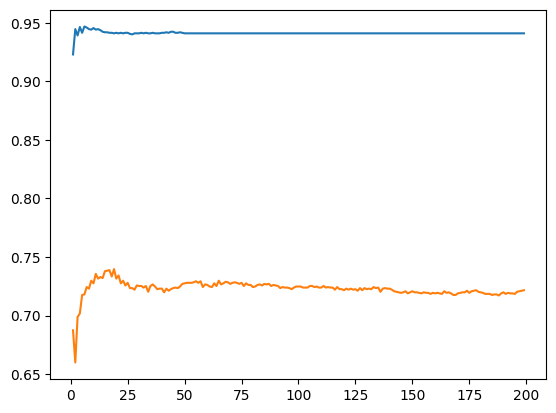

In [23]:
import matplotlib.pyplot as plt

scores_viral = []
scores_extreme = []

for k in range(1, 200):
    # For viral tweets
    classifier_viral = KNeighborsClassifier(n_neighbors=k)
    classifier_viral.fit(train_data_viral, train_labels_viral)
    scores_viral.append(classifier_viral.score(test_data_viral, test_labels_viral))
    # For extreme viral tweets
    classifier_extreme = KNeighborsClassifier(n_neighbors=k)
    classifier_extreme.fit(train_data_extreme, train_labels_extreme)
    scores_extreme.append(classifier_extreme.score(test_data_extreme, test_labels_extreme))

best_k_viral_tweets = scores_viral.index(max(scores_viral)) + 1
best_k_extreme_viral_tweets = scores_extreme.index(max(scores_extreme)) + 1

print(f"The best k for viral tweets is: {best_k_viral_tweets}\n")
print(f"The best k for extreme viral tweets is: {best_k_extreme_viral_tweets}\n")

print(f"The accuracy of the extreme viral classifier with the best k that is {best_k_extreme_viral_tweets} is: {scores_extreme[best_k_extreme_viral_tweets - 1]}")

plt.plot(range(1, 200), scores_viral)
plt.plot(range(1, 200), scores_extreme)
plt.show()

# Explore on your own

Nice work! You can see the classifier gets better as `k` increases, but as `k` gets too high, underfitting starts to happen.

By using the features `tweet_length`, `followers_count`, and `friends_count`, we were able to get up to around 63% accuracy. That is better than random, but still not exceptional. Can you find some different features that perform better? Share your graphs with us on Twitter and maybe it will go viral!

# Analyzing the perfect tweet: What does the extreme viral tweet look like?

We've found the `k` that gives us the highest accuracy for our classifier. Now, let's see what the perfect tweet looks like.

First, let's find the tweet with the highest number of retweets that is within the 95th percentile.

After, let's find some patterns that this tweets have in common.

Then we could insert a tweet in our model and see if it will be classified as extreme viral.




In [30]:
# let`s bring here the classifier for extreme tweets and now using the best K we found before that was 19

classifier_extreme = KNeighborsClassifier(n_neighbors=19)
classifier_extreme.fit(train_data_extreme, train_labels_extreme)

score_extreme = classifier_extreme.score(test_data_extreme, test_labels_extreme)


# Check if it is correct
print(f"The accuracy of the extreme viral classifier is: {score_extreme}\n")

number_extreme_tweets = len(all_tweets[all_tweets['extreme_viral_tweet'] == 1])

print(f"The number of extreme viral tweets is: {number_extreme_tweets}")

if number_extreme_tweets > 500:
    print(f"The number of extreme viral tweets is {number_extreme_tweets}, which is more than 500, and that's a lot to unpack 😅\n")
else:
    print(f"The number of extreme viral tweets is {number_extreme_tweets}, which is less than 500, and that's not a lot to unpack 😅")

# Analyzing the features of the extreme viral tweets

extreme_viral_tweets_list = all_tweets[all_tweets['extreme_viral_tweet'] == 1]

# Let's see the first 5 tweets
# print(extreme_viral_tweets_list.head())

# Let's see the last 5 tweets
# print(extreme_viral_tweets_list.tail())

# Analyzing the features of the extreme viral tweets have in common
word_count_extreme_viral_tweets = extreme_viral_tweets_list['num_words']
friends_count_extreme_viral_tweets = extreme_viral_tweets_list['friends_count']
followers_count_extreme_viral_tweets = extreme_viral_tweets_list['followers_count']
count_with_links = len(extreme_viral_tweets_list[extreme_viral_tweets_list['num_links'] == 1])
count_with_hashtags = len(extreme_viral_tweets_list[extreme_viral_tweets_list['num_hashtags'] == 1])

print(f"The average number of words in the extreme viral tweets is: {word_count_extreme_viral_tweets.mean()}\n")
print(f"The average number of friends in the extreme viral tweets is: {friends_count_extreme_viral_tweets.mean()}\n")
print(f"The average number of followers in the extreme viral tweets is: {followers_count_extreme_viral_tweets.mean()}\n")
print(f"The number of tweets with links in the extreme viral tweets is: {count_with_links}\n")
print(f"The number of tweets with hashtags in the extreme viral tweets is: {count_with_hashtags}\n")

if count_with_links < 250:
    print(f"The number of tweets with links in the extreme viral tweets is {count_with_links}, which is less than 250, and is much less than the half of the total number of extreme viral tweets, which is {number_extreme_tweets / 2}, this means that the links maybe are hurting the performance of the tweets, because the number of tweets with links is lower than the half of the total number of extreme viral tweets\n")
else:
    print(f"The number of tweets with links in the extreme viral tweets is {count_with_links}, which is more than 100, and that's a lot to unpack 😅\n")



if count_with_hashtags < 50:
    print(f"The number of tweets with hashtags in the extreme viral tweets is {count_with_hashtags}, which is less than 50, and is much less than the half of the total number of extreme viral tweets, which is {number_extreme_tweets / 2}, this means that the hashtags maybe are hurting the performance of the tweets, because the number of tweets with hashtags is lower than the half of the total number of extreme viral tweets\n")
else:
    print(f"The number of tweets with hashtags in the extreme viral tweets is {count_with_hashtags}, which is more than 50, and that's a lot to unpack 😅\n")














The accuracy of the extreme viral classifier is: 0.7396396396396396

The number of extreme viral tweets is: 555
The number of extreme viral tweets is 555, which is more than 500, and that's a lot to unpack 😅

The average number of words in the extreme viral tweets is: 20.396396396396398

The average number of friends in the extreme viral tweets is: 627.3081081081081

The average number of followers in the extreme viral tweets is: 729.5657657657657

The number of tweets with links in the extreme viral tweets is: 198

The number of tweets with hashtags in the extreme viral tweets is: 15

The number of tweets with links in the extreme viral tweets is 198, which is less than 250, and is much less than the half of the total number of extreme viral tweets, which is 277.5, this means that the links maybe are hurting the performance of the tweets, because the number of tweets with links is lower than the half of the total number of extreme viral tweets

The number of tweets with hashtags in th